In [4]:
import os
from glob import glob
from pprint import pprint

cwd = os.getcwd()
print(cwd)

py_files = glob('*.py')
print(py_files)

/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports
['config.py', 'global_config.py', 'equations.py']


In [5]:
import sys
sys.path.append("/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports")
### Import fields functions
from equations import *
from config import *
### Packages for some plotting to view outputs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import xarray as xr
import rasterio
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [6]:
config['prep_base_chunk'] = 500

print(config)

{'prep_file_dir': '/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/outputs', 'prep_tile_id': 'TPT', 'prep_base_chunk': 500, 'prep_time_chunk': 'auto', 'prep_remove_overlap': False, 'prep_manual_subset': True, 'prep_x_start': 7500, 'prep_y_start': 7500, 'prep_step': 500, 'prep_cloud_coverage_thresh': 50, 'prep_load_cloud_mask': True, 'prep_apply_cloud_mask': True, 'prep_cloud_mask_thresh': 70, 'prep_clip_outliers': True, 'prep_clip_percentile': 1, 'prep_normalize_bands': True, 'preproc_out_dir': 'preproc_out_dir/', 'preproc_outfile_prefix': 'fields_preproc_demo_', 'preproc_sample_pct': 0.05, 'preproc_n_clusters': 15, 'preproc_cluster_tile': True, 'kmeans_n_clusters': 15, 'kmeans_model_out_dir': 'kmeans_model_dir/', 'kmeans_8var_clusters': True, 'kmeans_std_thresh': 0.2, 'kmeans_min_thresh': 0, 'kmeans_max_thresh': 0.3, 'kmeans_range_thresh': 0.7, 'kmeans_ndwi_thresh': 0.2, 'kmeans_mask_out_dir': 'mask_out_dir/', 'kmeans_from_full_tile_mask': False, 'seg_rgb_date_str':

In [7]:
from rasterio.plot import show

In [8]:
prep_file_dir =glob.glob("/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/outputs/*.tif")
from dea_tools.datahandling import paths_to_datetimeindex
from dea_tools.plotting import rgb
# Iterate through the list of file paths

"""for f in prep_file_dir[:-1]:
    print(f)
    with rasterio.open(f) as source:
        all_bands = source.read()
        # Select the band you want to show
        band1 = all_bands[0]
        NVDI_bands = result_array.append(all_bands)"""
    
    
time_var = xr.Variable('time', paths_to_datetimeindex(prep_file_dir,
                                                      string_slice=(0, -4)))

"""import re

d = prep_file_dir[0]
d = re.sub('output_[A-Z]+[0-9]+-BY[.]([0-9]+)[.]csv$', r'\1', d)
print(d)"""
# Load in and concatenate all individual GeoTIFFs
geotiffs_da = xr.concat([xr.open_rasterio(i) for i in prep_file_dir],
                        dim=time_var)

# Covert our xarray.DataArray into a xarray.Dataset
geotiffs_ds = geotiffs_da.to_dataset('band')

# Rename the variable to a more useful name
geotiffs_ds = geotiffs_ds.rename({1: 'NDVI',2: 'WDRVI',3: 'SAVI'})

# Print the output
print(geotiffs_ds)

/var/folders/r5/x0f4tdrx40s9xs060kqd7t440000gn/T/ipykernel_65085/114643706.py:24: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  geotiffs_da = xr.concat([xr.open_rasterio(i) for i in prep_file_dir],


<xarray.Dataset>
Dimensions:  (time: 16, y: 1221, x: 1221)
Coordinates:
  * y        (y) float64 1.3e+06 1.3e+06 1.3e+06 ... 1.19e+06 1.19e+06 1.19e+06
  * x        (x) float64 7e+05 7.001e+05 7.002e+05 ... 8.097e+05 8.098e+05
  * time     (time) datetime64[ns] 2019-09-29 2019-12-19 ... 2019-12-28
Data variables:
    NDVI     (time, y, x) float64 0.0 0.0 0.0 0.0 ... 0.1942 0.1829 0.1942 0.0
    WDRVI    (time, y, x) float64 0.0 0.0 0.0 0.0 ... -0.5428 -0.551 -0.5427 0.0
    SAVI     (time, y, x) float64 0.0 0.0 0.0 0.0 ... 0.2912 0.2743 0.2913 0.0
Attributes:
    transform:               (90.0, 0.0, 699960.0, 0.0, -90.0, 1300110.0)
    crs:                     +init=epsg:32630
    res:                     (90.0, 90.0)
    is_tiled:                1
    nodatavals:              (0.0, 0.0, 0.0)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1

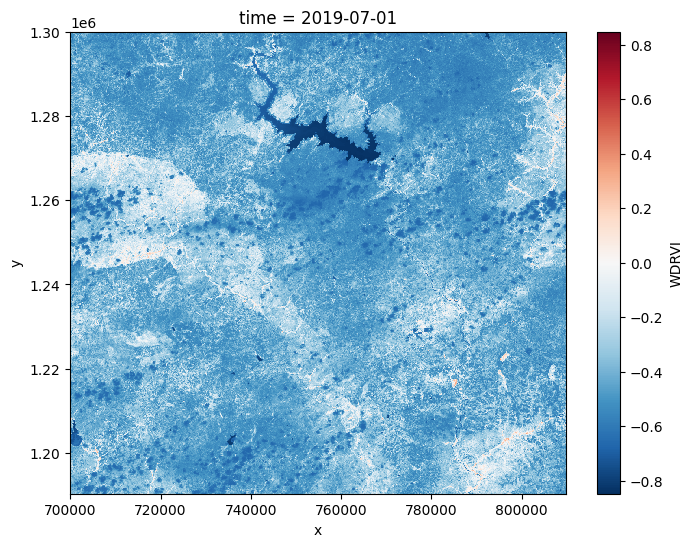

In [9]:


geotiffs_ds.isel(time=5).WDRVI.plot(figsize=(8,6))



In [10]:
out_dir = config['preproc_out_dir']
out_file_name = config['preproc_outfile_prefix'] + config['prep_tile_id']
sample_pct = config['preproc_sample_pct']
n_clusters = config['preproc_n_clusters']
cluster_tile = config['preproc_cluster_tile']

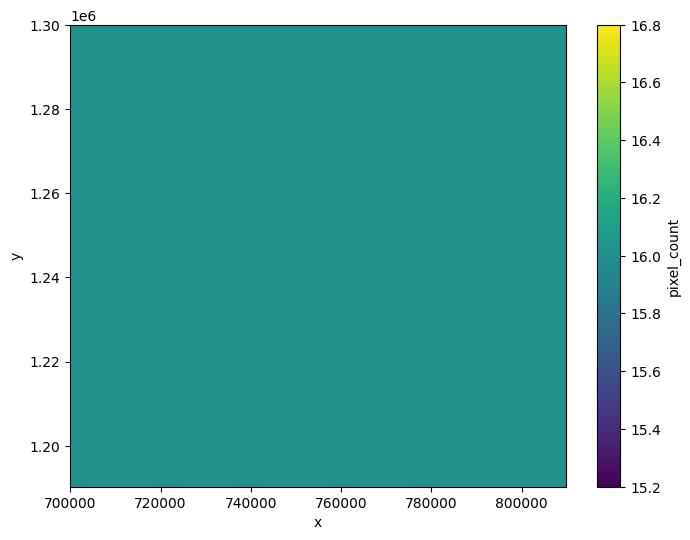

In [11]:
### Cloud-free (or not-cloud-masked) pixel count
pixel_count = geotiffs_ds.SAVI.count(dim='time')
pixel_count.name = 'pixel_count'

pixel_count.plot(figsize=(8,6))


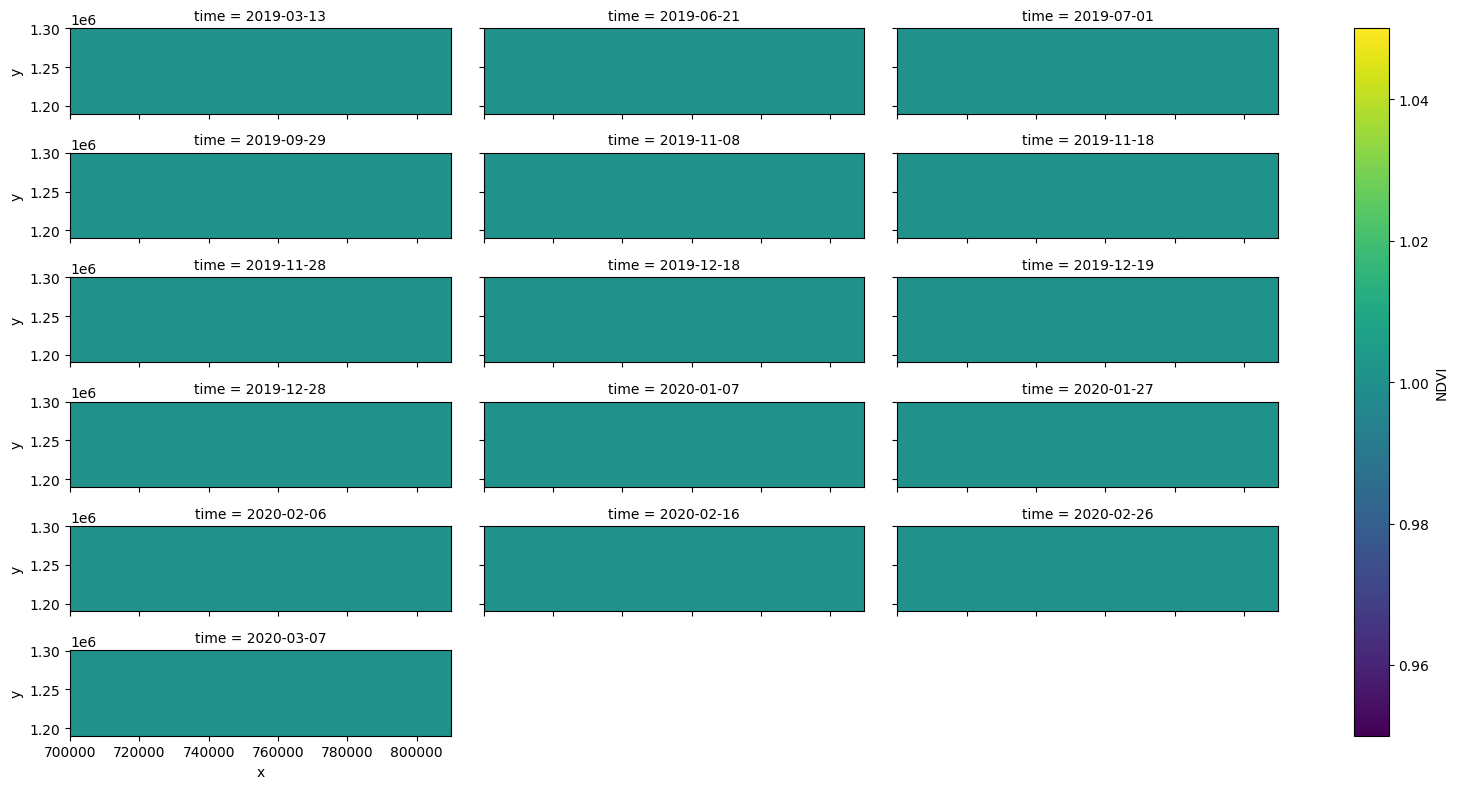

In [12]:

pixel_count_mon = geotiffs_ds.NDVI.groupby('time').count()

pixel_count_mon.plot(figsize=(16,8), x='x', y='y', col='time', col_wrap=3)

In [13]:
def ndwi_xr_new(input_ds):
    """
    computes the Normalized Difference Water Index
    """
    np.seterr(divide='ignore', invalid='ignore')
    return ((input_ds.WDRVI - input_ds.NDVI)/(input_ds.WDRVI + input_ds.NDVI))


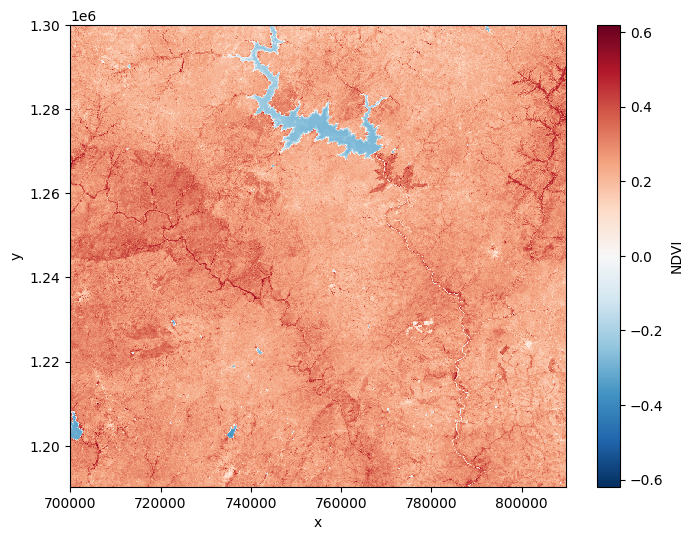

In [14]:
### NDWI stats: 
### NDWI mean
print(geotiffs_ds.NDVI.mean(dim='time').plot(figsize=(8,6)))

In [15]:
def ndvi_xr_new(input_ds):
    '''
    computes the Normalized Difference Vegetation Index
    '''
    np.seterr(divide='ignore', invalid='ignore')
    return ((input_ds.WDRVI - input_ds.NDVI)/(input_ds.WDRVI + input_ds.NDVI))

In [16]:


### NDVI stats: 
### Standard Deviation appears to be the most resistant to noise/clouds (compared to min, max, range, mean)
ndvi_mean = ndvi_xr_new(geotiffs_ds).mean(dim='time', skipna = True)
ndvi_max = ndvi_xr_new(geotiffs_ds).max(dim='time', skipna = True)  # Influenced by clouds
ndvi_min = ndvi_xr_new(geotiffs_ds).min(dim='time', skipna = True)  # Influenced by clouds
ndvi_range = ndvi_max - ndvi_min                                  # Influenced by clouds, might be better with monthly mean
ndvi_std = ndvi_xr_new(geotiffs_ds).std(dim='time', skipna = True)    # pretty resistant to cloud noise
ndvi_var =ndvi_xr_new(geotiffs_ds).var(dim='time', skipna = True)



/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/venv/lib/python3.11/site-packages/xarray/core/nputils.py:157: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


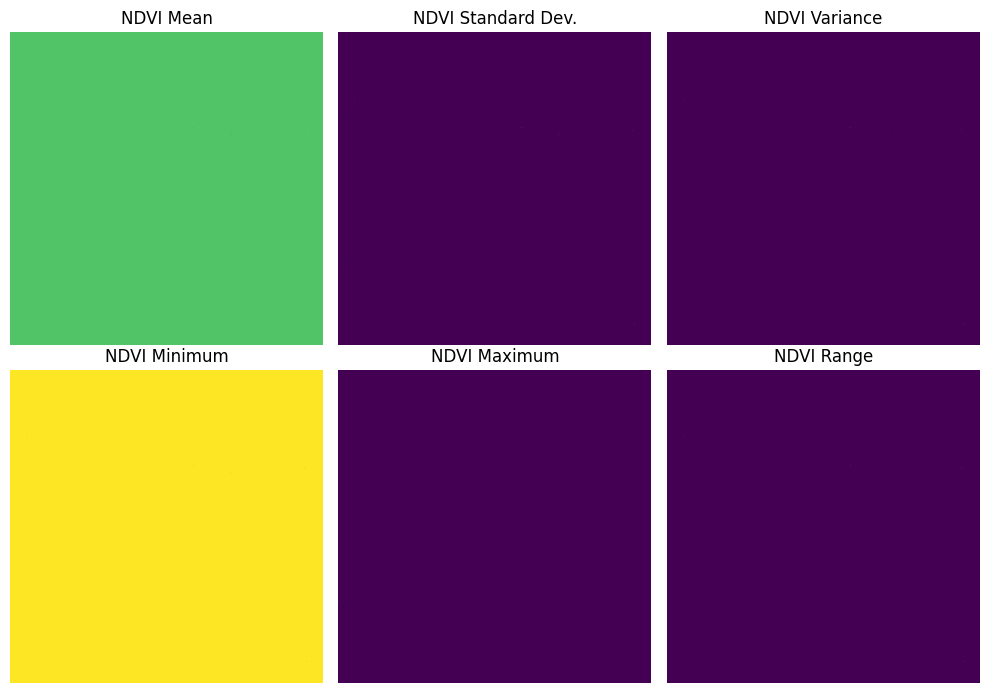

In [17]:
### Visualize the outputs
fig, ax = plt.subplots(2, 3, figsize = (10, 7), sharex=True, sharey=True)

ax[0][0].imshow(ndvi_mean)
ax[0][0].axis('off')
ax[0][0].set_title('NDVI Mean')

ax[0][1].imshow(ndvi_std)
ax[0][1].axis('off')
ax[0][1].set_title('NDVI Standard Dev.')

ax[0][2].imshow(ndvi_var)
ax[0][2].axis('off')
ax[0][2].set_title('NDVI Variance')

ax[1][0].imshow(ndvi_min)
ax[1][0].axis('off')
ax[1][0].set_title('NDVI Minimum')

ax[1][1].imshow(ndvi_max)
ax[1][1].axis('off')
ax[1][1].set_title('NDVI Maximum')

ax[1][2].imshow(ndvi_range)
ax[1][2].axis('off')
ax[1][2].set_title('NDVI Range')

fig.tight_layout()
plt.show()




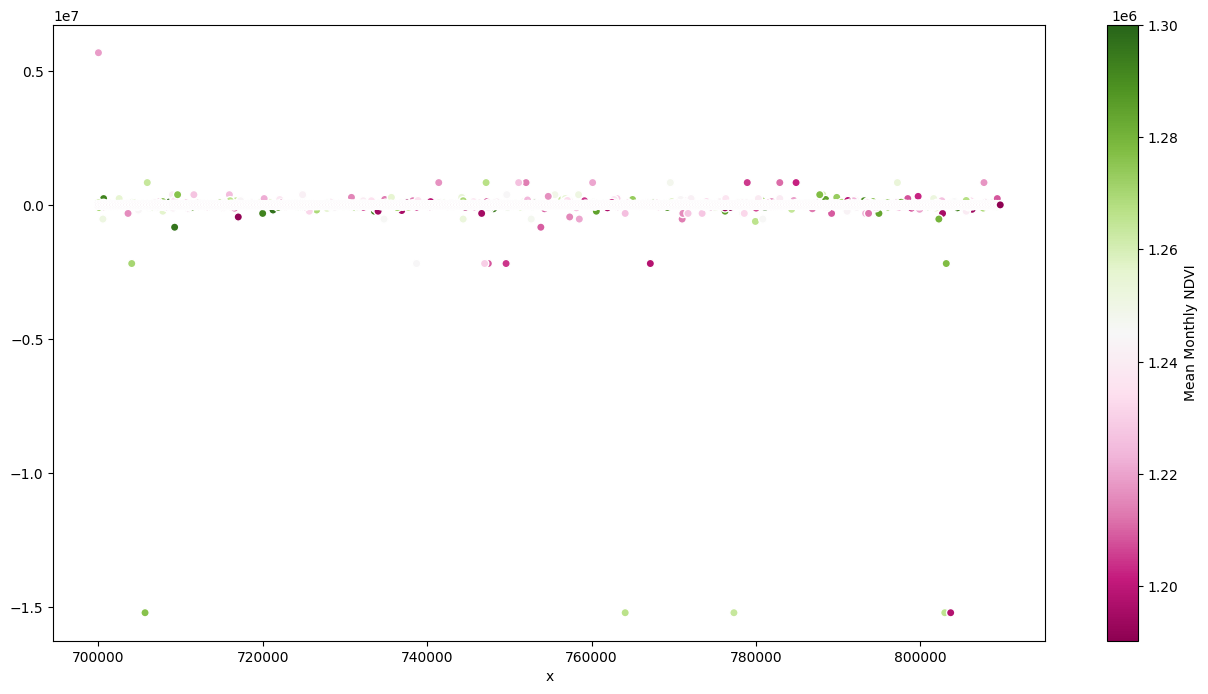

In [18]:


### Monthly mean NDVI
ndvi_mon_mean = ndvi_xr_new(geotiffs_ds.groupby('time').mean())

ndvi_mon_mean.plot.scatter(figsize=(16,8), x='x', y='y', col_wrap=3, cmap='PiYG',
                                                          cbar_kwargs={'label': 'Mean Monthly NDVI'})



In [40]:
%%time
### START TIMING
t_start = time.perf_counter()
t_proc_start = time.process_time()

### Median - can't be computed with dask arrays, so it has to be converted to np arrays and the full stack loaded into memory and processed serially
ds_time_stack_no_dask = xr.Dataset({'NDVI':(['time', 'y', 'x'],geotiffs_ds.NDVI.data),
                                    'SAVI':(['time', 'y', 'x'],geotiffs_ds.SAVI.data)}, coords=geotiffs_ds.coords)

### Compute monthly median and convert output to dask by passing chunk size method
ndvi_mon_med = ndvi_xr(ds_time_stack_no_dask.median().groupby('time')).chunk({'x':'auto', 'y':'auto'})

    ### STOP TIMING
print("Monthly Median Total CPU time:", time.process_time() - t_proc_start)
print("Monthly Median Total Wall time:", time.perf_counter() - t_start)



KeyError: 'time'